In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Database Details 

##### Numerical Features Informantion

- Popularity: popularity in the most part, is based on the total number of plays the track has had and how recent those plays are. Songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.

- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

- Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

##### Categorical Features Informantion

- Explicit: The is whether the song has adult related content.

- Key: Each number represents the 12 notes in music.
    - C  = 0
    - C# = 1
    - D  = 2
    - D# = 3
    - E  = 4
    - F  = 5
    - F# = 6
    - G  = 7
    - G# = 8
    - A  = 9
    - A# = 10
    - B  = 11


- Mode: Determine whether the musical key is major-1 or minor-0.

- Time signature: Typically 4, and it respresents the timing of the music.

<h5>Database</h5>

In [3]:
df = pd.read_csv('tracks_cleaned.csv')
df.head()

,arist_id,artist_name,track_name,track_id,popularity,explicit,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mode
0,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,L.I.F.E,0eyJ7wobiSnBiviFjDD4WV,13,False,2021-03-24,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.0,0.294,0.332,144.046,162194.0,4.0,1.0
1,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,G-spot,0n5HmWeoStEZzxdu4DFiBv,10,False,2021-02-19,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.0,0.118,0.630,80.210,217365.0,4.0,0.0
2,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,High grade,19BuQIrARlDVkOgY06BuP2,10,False,2021-04-26,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.0,0.113,0.135,99.932,222981.0,4.0,0.0
3,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Story,4Fvl6HcI4kfiACcelfWhkw,10,False,2021-07-15,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.0,0.146,0.574,131.662,194718.0,5.0,0.0
4,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Bubble,4VJMkS6IEdG7pN8UpJugvT,12,False,2021-09-10,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.0,0.405,0.293,70.254,195429.0,3.0,0.0


In [4]:
# df_artists = pd.DataFrame(df['artist_name'].unique(), columns=['artists'])

In [5]:
df.shape

(38274, 20)

Take a look at the summary of the dataset

In [6]:
df.describe()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mode
count,38274.000000,38240.000000,38240.000000,38240.000000,38240.000000,38240.000000,38240.000000,38240.000000,38240.000000,38240.000000,38240.000000,3.824000e+04,38240.000000,38256.000000
mean,8.752704,0.719391,0.604170,5.538886,-8.505222,0.158566,0.193518,0.078902,0.187600,0.693734,117.213799,2.271493e+05,4.005884,0.592848
std,11.560587,0.121259,0.170058,3.598019,3.781536,0.126176,0.216001,0.220970,0.165421,0.194007,32.478779,1.138141e+05,0.311301,0.491310
min,0.000000,0.000000,0.000020,0.000000,-38.541000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.629000e+03,0.000000,0.000000
25%,0.000000,0.650000,0.484000,2.000000,-10.757000,0.058500,0.029100,0.000000,0.083500,0.570000,87.357750,1.910368e+05,4.000000,0.000000
50%,4.000000,0.736000,0.613000,6.000000,-7.756000,0.114000,0.112000,0.000002,0.123000,0.721000,116.001000,2.183730e+05,4.000000,1.000000
75%,13.000000,0.806000,0.731000,9.000000,-5.711750,0.236000,0.285000,0.001462,0.248000,0.849000,142.073250,2.445200e+05,4.000000,1.000000
max,85.000000,0.990000,0.998000,11.000000,0.160000,0.961000,0.995000,0.990000,0.999000,0.998000,244.835000,3.860396e+06,5.000000,1.000000


In [7]:
df.rename(columns={'arist_id':'artist_id'}, inplace=True)
df.describe(include=['object'])

,artist_id,artist_name,track_name,track_id,release_date
count,38274,38274,38274,38274,38274
unique,280,280,23759,36673,1750
top,4tHqkqP0DCD8Ek5OPvYTzH,Audio Idols,Intro,6JfkjuC1X20cQZCiLsDXWQ,2019-07-14
freq,510,510,44,4,526


## Handle Missing Data

In [8]:
# show count of missing data
df.isnull().sum()

artist_id            0
artist_name          0
track_name           0
track_id             0
popularity           0
explicit             0
release_date         0
danceability        34
energy              34
key                 34
loudness            34
speechiness         34
acousticness        34
instrumentalness    34
liveness            34
valence             34
tempo               34
duration_ms         34
time_signature      34
mode                18
dtype: int64

In [9]:
# Drop all rows with null values
df.dropna(inplace=True)

In [10]:
# Gather all the numerial features
features = df.loc[:, df.dtypes != object].columns.tolist()

In [11]:
# check to see the features with zeros
df[df[features] == 0].count()

artist_id               0
artist_name             0
track_name              0
track_id                0
popularity           9961
explicit            35610
release_date            0
danceability           21
energy                  0
key                  4176
loudness                0
speechiness            21
acousticness            2
instrumentalness    18083
liveness                7
valence                23
tempo                  21
duration_ms             0
time_signature         21
mode                15568
dtype: int64

In [12]:
df.drop(index=df[df['danceability'] == 0].index, inplace=True)
df.drop(index=df[df['speechiness'] == 0].index, inplace=True)
df.drop(index=df[df['acousticness'] == 0].index, inplace=True)
df.drop(index=df[df['liveness'] == 0].index, inplace=True)
df.drop(index=df[df['valence'] == 0].index, inplace=True)
df.drop(index=df[df['tempo'] == 0].index, inplace=True)

- There are too many zeros for instrumentalness; almost half the dataset so that field will be dropped.
- Rows with zeros in danceability, speechiness acousticness, liveness, valence and tempo can be assumed to be errors and removed

In [13]:
features.remove('instrumentalness')
df.drop(columns=['instrumentalness'], inplace=True)

In [14]:
# check to see the features with zeros
df[df[features] == 0].count()

artist_id             0
artist_name           0
track_name            0
track_id              0
popularity         9937
explicit          35586
release_date          0
danceability          0
energy                0
key                4172
loudness              0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_ms           0
time_signature        0
mode              15564
dtype: int64

## Handle Features

In [15]:
df.head()

,artist_id,artist_name,track_name,track_id,popularity,explicit,release_date,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms,time_signature,mode
0,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,L.I.F.E,0eyJ7wobiSnBiviFjDD4WV,13,False,2021-03-24,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.294,0.332,144.046,162194.0,4.0,1.0
1,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,G-spot,0n5HmWeoStEZzxdu4DFiBv,10,False,2021-02-19,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.118,0.630,80.210,217365.0,4.0,0.0
2,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,High grade,19BuQIrARlDVkOgY06BuP2,10,False,2021-04-26,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.113,0.135,99.932,222981.0,4.0,0.0
3,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Story,4Fvl6HcI4kfiACcelfWhkw,10,False,2021-07-15,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.146,0.574,131.662,194718.0,5.0,0.0
4,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Bubble,4VJMkS6IEdG7pN8UpJugvT,12,False,2021-09-10,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.405,0.293,70.254,195429.0,3.0,0.0


Convert date to year

In [16]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year

In [17]:
df = df.drop(columns=['release_date'])

Convert ms to minutes

In [18]:
df['duration'] = df['duration_ms']/60000

In [19]:
df = df.drop(columns=['duration_ms'])

In [20]:
df.head()

,artist_id,artist_name,track_name,track_id,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,mode,release_year,duration
0,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,L.I.F.E,0eyJ7wobiSnBiviFjDD4WV,13,False,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.294,0.332,144.046,4.0,1.0,2021,2.703233
1,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,G-spot,0n5HmWeoStEZzxdu4DFiBv,10,False,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.118,0.630,80.210,4.0,0.0,2021,3.622750
2,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,High grade,19BuQIrARlDVkOgY06BuP2,10,False,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.113,0.135,99.932,4.0,0.0,2021,3.716350
3,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Story,4Fvl6HcI4kfiACcelfWhkw,10,False,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.146,0.574,131.662,5.0,0.0,2021,3.245300
4,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Bubble,4VJMkS6IEdG7pN8UpJugvT,12,False,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.405,0.293,70.254,3.0,0.0,2021,3.257150


## Plots

In [21]:
df_2 = df.drop(['artist_id', 'track_id', 'track_name', 'artist_name', 'explicit', 'time_signature'], axis='columns')

In [22]:
df_2.head()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration
0,13,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.294,0.332,144.046,1.0,2021,2.703233
1,10,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.118,0.630,80.210,0.0,2021,3.622750
2,10,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.113,0.135,99.932,0.0,2021,3.716350
3,10,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.146,0.574,131.662,0.0,2021,3.245300
4,12,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.405,0.293,70.254,0.0,2021,3.257150


<h5>Correlations</h5>

<AxesSubplot:title={'center':'Correlation Between Track Features'}>

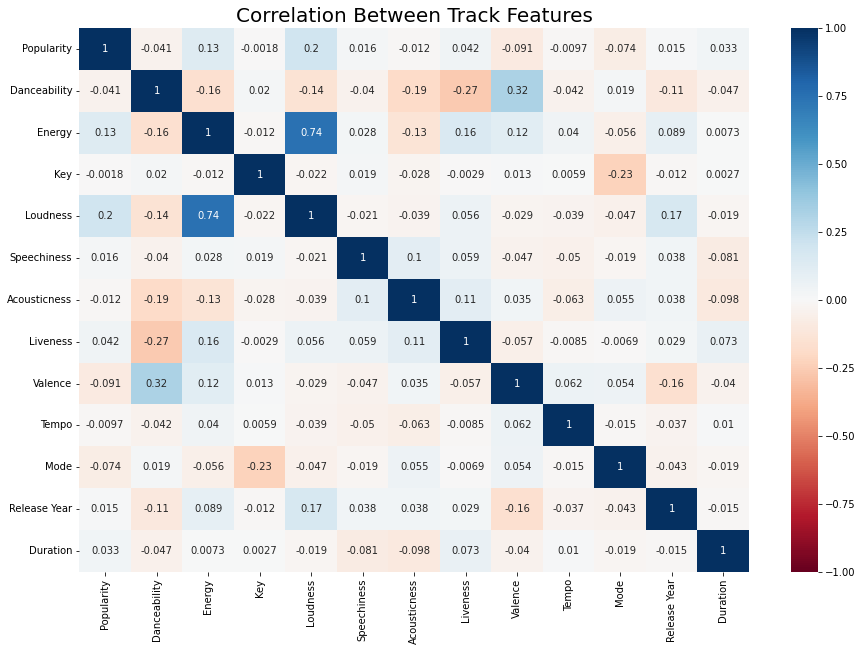

In [23]:
labels = ['Popularity', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
          'Liveness', 'Valence', 'Tempo', 'Mode', 'Release Year', 'Duration'
         ]

plt.figure(figsize=(15,10))
plt.title(label="Correlation Between Track Features", fontsize=20)
sns.heatmap(df_2.corr(), 
            cmap='RdBu', 
            center=0, 
            vmin=-1, 
            vmax=1, 
            annot=True,
            xticklabels=labels,
            yticklabels=labels
           )

<h5>Distributions</h5>

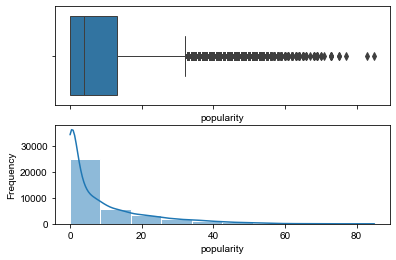

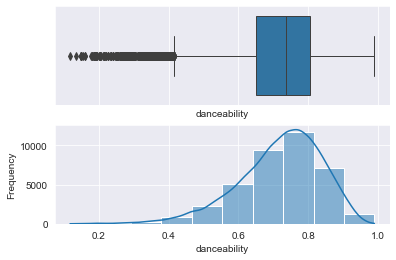

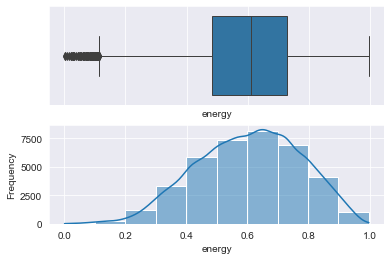

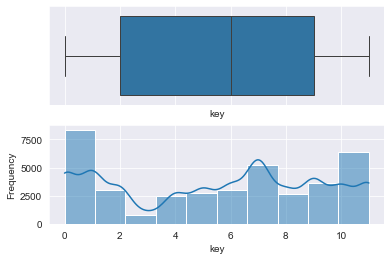

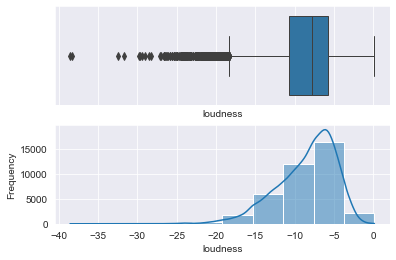

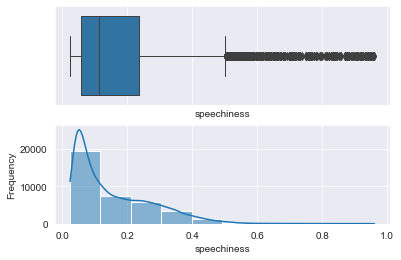

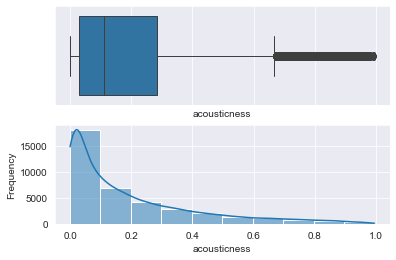

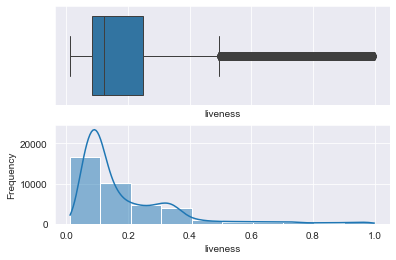

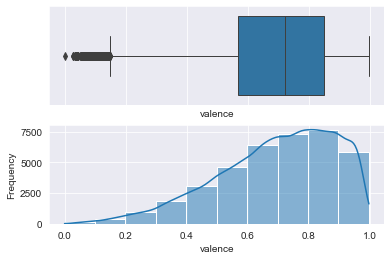

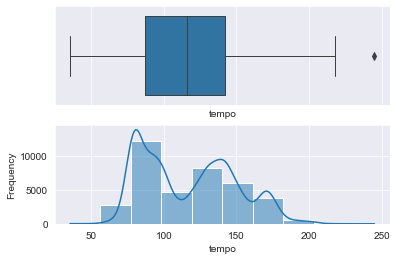

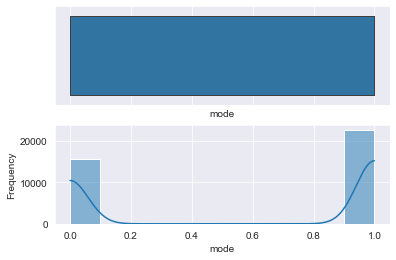

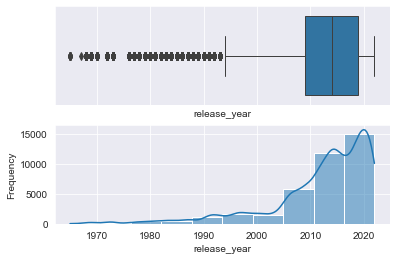

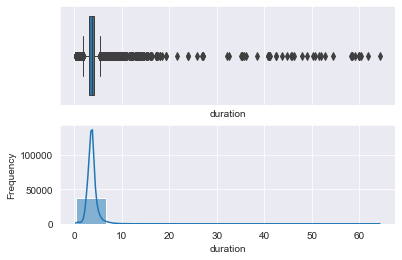

In [24]:
for i in df_2.columns:
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    
    sns.set_style('darkgrid')
    sns.boxplot(x=df_2[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df_2[i], ax=ax_hist , bins = 10,kde=True)

<h5>General Relationships</h5>

Line graph showing the changes in features over time

In [25]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']

In [26]:
df_3 = pd.pivot_table(df_2, index='release_year', values=features)

<AxesSubplot:xlabel='Release Year', ylabel='Features'>

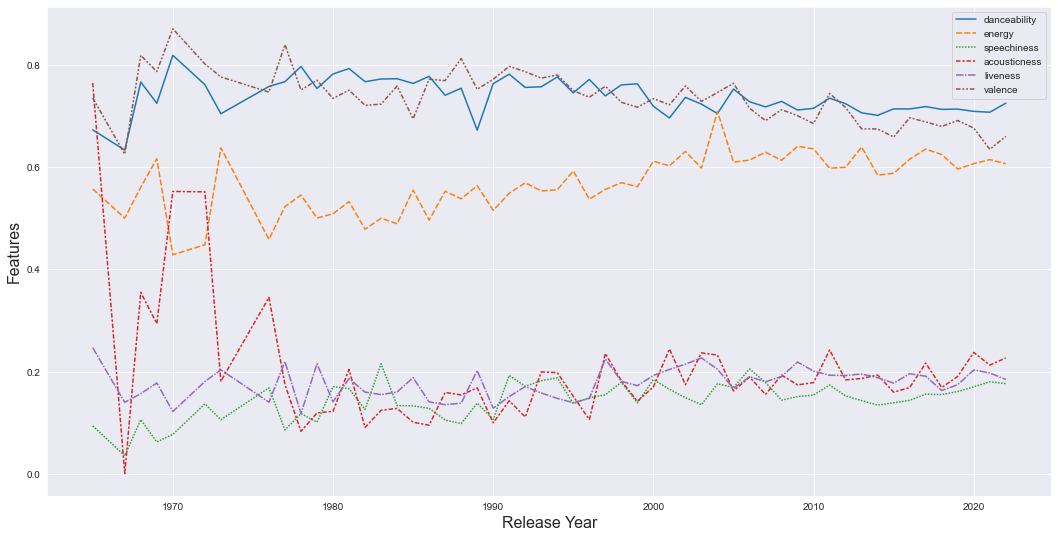

In [27]:
# %%time
plt.figure(figsize=(18,9))
plt.xlabel('Release Year', fontsize=16) 
plt.ylabel('Features', fontsize=16)


sns.lineplot(data=df_3[features])


<AxesSubplot:xlabel='loudness', ylabel='energy'>

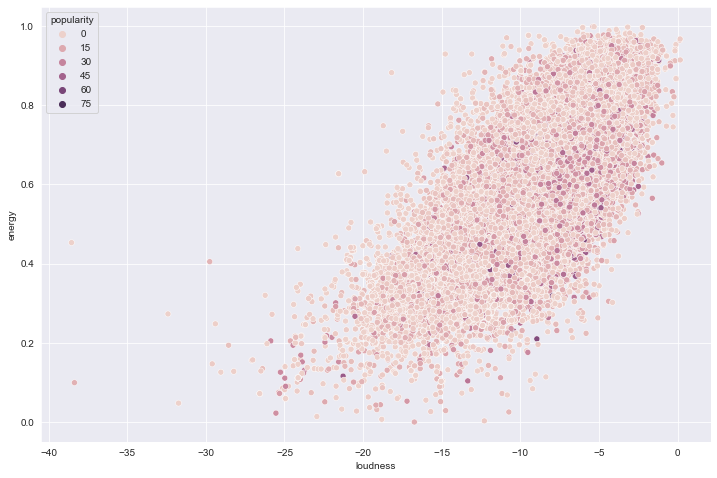

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_2['loudness'], y=df_2['energy'], hue=df_2['popularity'])

<AxesSubplot:xlabel='loudness', ylabel='popularity'>

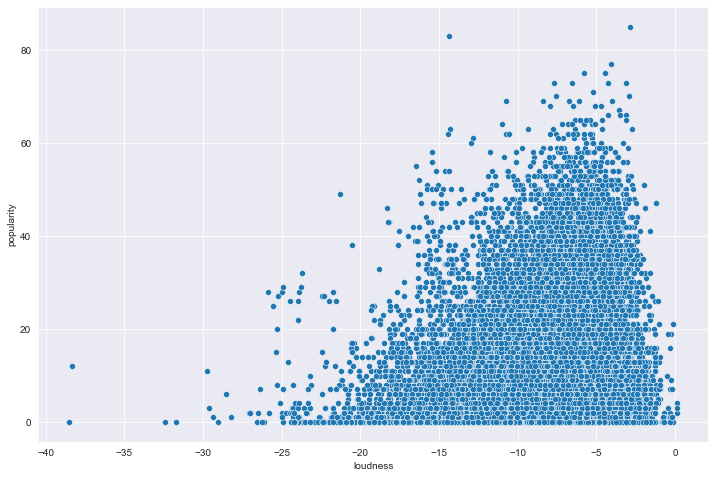

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_2['loudness'], y=df_2['popularity'])

<AxesSubplot:xlabel='energy', ylabel='popularity'>

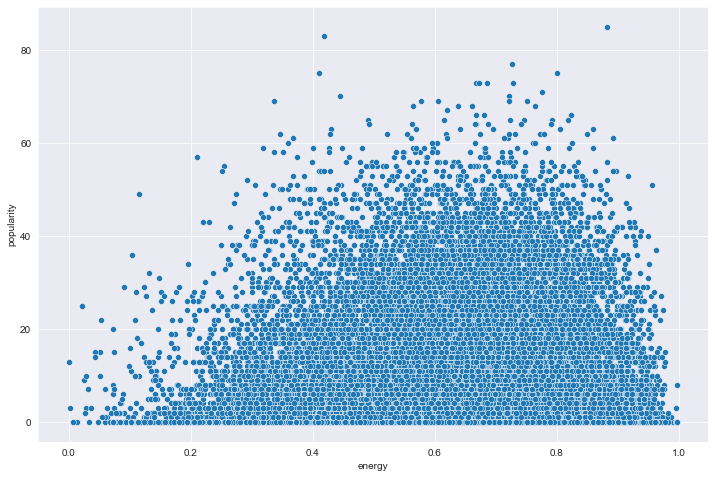

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_2['energy'], y=df_2['popularity'])

<AxesSubplot:xlabel='danceability', ylabel='liveness'>

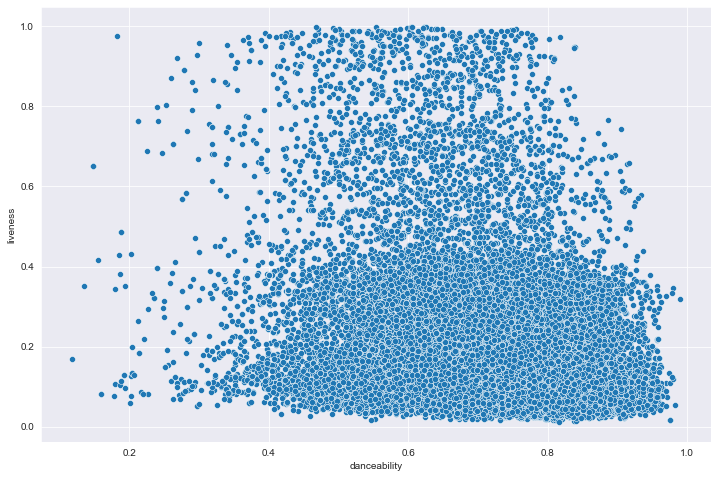

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_2['danceability'], y=df_2['liveness'])

<AxesSubplot:xlabel='energy', ylabel='liveness'>

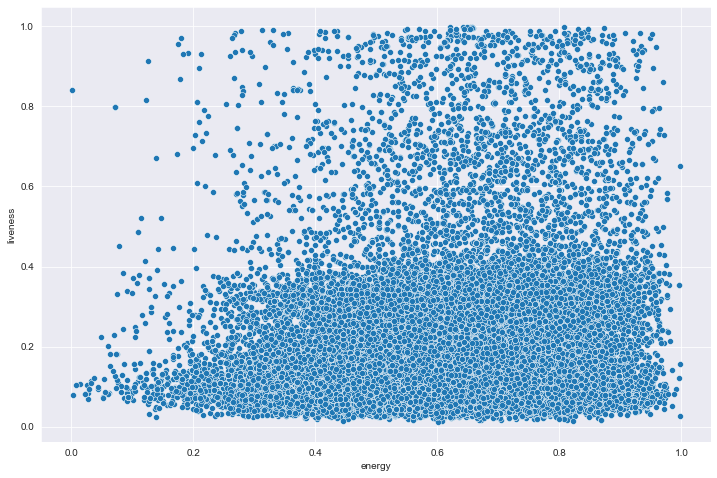

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_2['energy'], y=df_2['liveness'])

<AxesSubplot:xlabel='energy', ylabel='valence'>

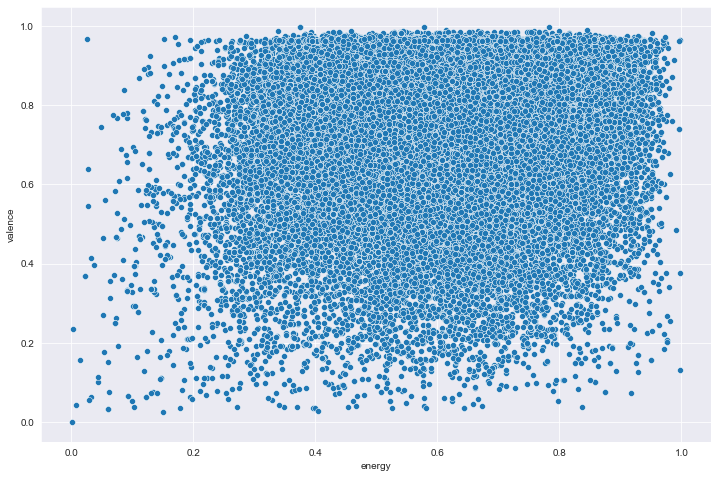

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_2['energy'], y=df_2['valence'])

<AxesSubplot:xlabel='danceability', ylabel='valence'>

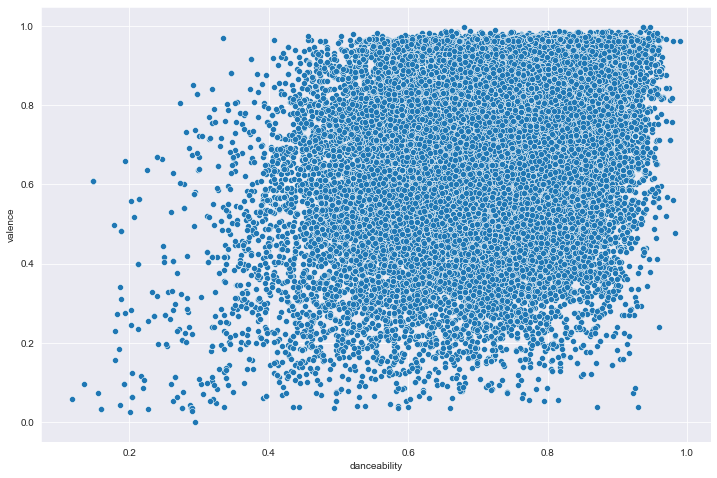

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_2['danceability'], y=df_2['valence'])

In [35]:
df.to_csv('tracks_cleaned_2.csv', index=False)